In [131]:
#libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report,roc_curve,roc_auc_score

#For logistic Regression model
from sklearn.linear_model import LogisticRegression # Focused Algorithm 



In [132]:
#lets read the file and perform EDA
bank=pd.read_csv("/content/sample_data/bank-full.csv")
bank.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [133]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [134]:
#lets do OHE for categorical variable
bank1=pd.get_dummies(bank,columns=['job','marital','education','contact','poutcome','month'])
bank1.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,no,2143,yes,no,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,no,29,yes,no,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,no,2,yes,yes,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,no,1506,yes,no,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,no,1,no,no,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0


In [135]:
bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   age                  45211 non-null  int64 
 1   default              45211 non-null  object
 2   balance              45211 non-null  int64 
 3   housing              45211 non-null  object
 4   loan                 45211 non-null  object
 5   day                  45211 non-null  int64 
 6   duration             45211 non-null  int64 
 7   campaign             45211 non-null  int64 
 8   pdays                45211 non-null  int64 
 9   previous             45211 non-null  int64 
 10  y                    45211 non-null  object
 11  job_admin.           45211 non-null  uint8 
 12  job_blue-collar      45211 non-null  uint8 
 13  job_entrepreneur     45211 non-null  uint8 
 14  job_housemaid        45211 non-null  uint8 
 15  job_management       45211 non-null  uint8 
 16  job_

In [136]:
#lets put 'default','housing','loan','y' in to binary format rather than categorical
bank1['default']=np.where(bank1['default'].str.contains("yes"),1,0)
bank1['housing']=np.where(bank1['housing'].str.contains("yes"),1,0)
bank1['loan']=np.where(bank1['loan'].str.contains("yes"),1,0)
bank1['y']=np.where(bank1['y'].str.contains("yes"),1,0)
bank1.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0


In [137]:
bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int64
 11  job_admin.           45211 non-null  uint8
 12  job_blue-collar      45211 non-null  uint8
 13  job_entrepreneur     45211 non-null  uint8
 14  job_housemaid        45211 non-null  uint8
 15  job_management       45211 non-null  uint8
 16  job_retired          4

In [138]:
#model building
x=pd.concat([bank1.iloc[:,0:11],bank1.iloc[:,12:]],axis=1)
y=bank1.iloc[:,10]


In [139]:
model=LogisticRegression()
model.fit(x,y)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [140]:
y_pred=model.predict(x)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [141]:
y_df=pd.DataFrame({'y_actual':y,'y_predicted':y_pred})
y_df

,y_actual,y_predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,1
45208,1,1
45209,0,0


In [142]:
conf_mat=confusion_matrix(y,y_pred)
conf_mat

array([[39622,   300],
       [ 1103,  4186]])

In [143]:
#lets check all score testing model accruacy
recall_score(y,y_pred)

0.7914539610512384

In [144]:
precision_score(y,y_pred)

0.9331252786446723

In [145]:
accuracy_score(y,y_pred)

0.9689677290924775

In [146]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     39922
           1       0.93      0.79      0.86      5289

    accuracy                           0.97     45211
   macro avg       0.95      0.89      0.92     45211
weighted avg       0.97      0.97      0.97     45211



In [147]:
#for checking cut-off values
y_pred_prob=model.predict_proba(x)
pred_proba_df = pd.DataFrame(y_pred_prob)
pred_proba_df

,0,1
0,0.995747,0.004253
1,0.998699,0.001301
2,0.999376,0.000624
3,0.998815,0.001185
4,0.982730,0.017270
...,...,...
45206,0.024548,0.975452
45207,0.034652,0.965348
45208,0.089148,0.910852
45209,0.992656,0.007344



******** For i = 0.2 ******
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     39922
           1       0.79      0.89      0.84      5289

    accuracy                           0.96     45211
   macro avg       0.89      0.93      0.91     45211
weighted avg       0.96      0.96      0.96     45211



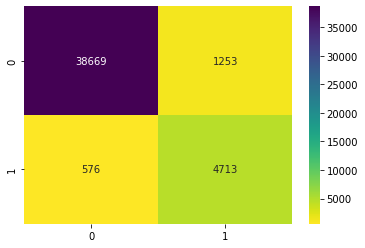

                 

******** For i = 0.3 ******
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     39922
           1       0.87      0.86      0.86      5289

    accuracy                           0.97     45211
   macro avg       0.92      0.92      0.92     45211
weighted avg       0.97      0.97      0.97     45211



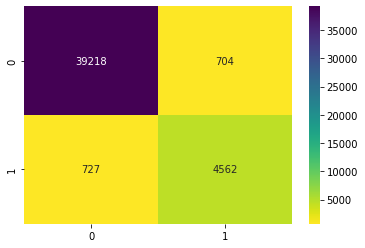

                 

******** For i = 0.4 ******
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     39922
           1       0.91      0.83      0.87      5289

    accuracy                           0.97     45211
   macro avg       0.94      0.91      0.93     45211
weighted avg       0.97      0.97      0.97     45211



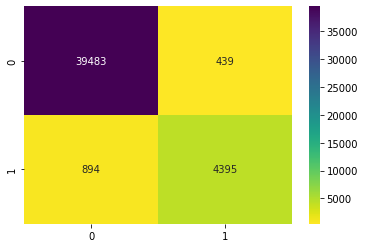

                 

******** For i = 0.5 ******
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     39922
           1       0.93      0.79      0.86      5289

    accuracy                           0.97     45211
   macro avg       0.95      0.89      0.92     45211
weighted avg       0.97      0.97      0.97     45211



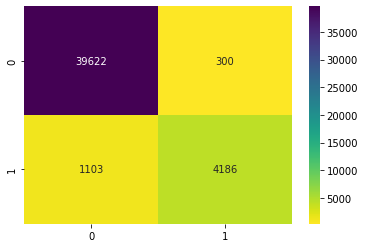

                 

******** For i = 0.6 ******
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     39922
           1       0.95      0.75      0.84      5289

    accuracy                           0.97     45211
   macro avg       0.96      0.87      0.91     45211
weighted avg       0.97      0.97      0.96     45211



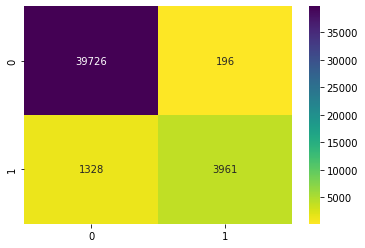

                 

******** For i = 0.7 ******
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     39922
           1       0.97      0.70      0.81      5289

    accuracy                           0.96     45211
   macro avg       0.96      0.85      0.89     45211
weighted avg       0.96      0.96      0.96     45211



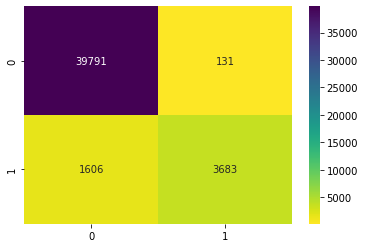

                 

******** For i = 0.8 ******
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     39922
           1       0.97      0.62      0.76      5289

    accuracy                           0.95     45211
   macro avg       0.96      0.81      0.87     45211
weighted avg       0.95      0.95      0.95     45211



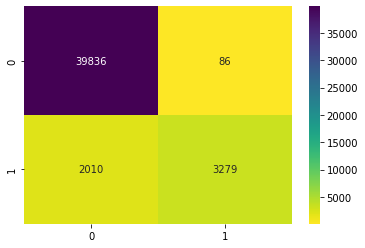

In [148]:
# Use Cut-off value to predict the recall_score and accuracy_score.
cutoff_list = [0.2,0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
for i in cutoff_list:
    print ('\n******** For i = {} ******'.format(i))
    y_pred = pd.DataFrame(np.where(pred_proba_df.iloc[:,1:2] > i, 1, 0))
    test_recall_score = recall_score(y, y_pred)
    test_acu_score = metrics.roc_auc_score(y, y_pred)
    test_precision_score = precision_score(y, y_pred)
    print(classification_report(y, y_pred))
    sns.heatmap((confusion_matrix(y, y_pred)),annot=True,fmt='.5g',cmap='viridis_r')
    plt.show()
    print("                 ")

Text(0, 0.5, 'True Positive Rate')

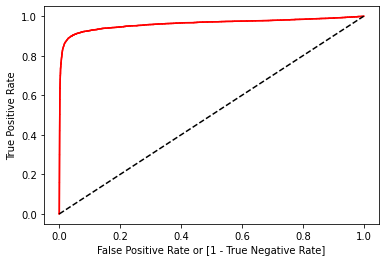

In [149]:

# ROC Curve plotting and finding AUC value
fpr,tpr,threshold=roc_curve(y, model.predict_proba(x)[:,1])
plt.plot(fpr,tpr,color='red')
auc = roc_auc_score(y, y_pred)
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [150]:
auc

0.8089058832050916